In [21]:
import numpy as np
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

from matplotlib import animation
from JSAnimation.IPython_display import display_animation
import matplotlib.pyplot as plt

In [2]:
L = 1
nt = 100
nx = 51
alpha = 1.22e-3

dx = L/(nx-1)

Ti = np.zeros(nx)
Ti[0] = 100

In [3]:
def ftcs(T, nt, dt, dx, alpha):
    """Solves the diffusion equation with forward-time, centered scheme
    
    Parameters:
    ----------
    T: array of float
        Initial temperature profile
    nt: int
        Number of time steps
    dt: float
        Time step size
    dx: float
        Mesh size
    alpha: float
        Diffusion coefficient (thermal diffusivity)
        
    Returns:
    -------
    T: array of float
        Temperature profile after nt time steps with forward in time scheme
    
    """
    
    for n in range(nt):  
        Tn = T.copy() 
        T[1:-1] = Tn[1:-1] + alpha*dt/dx**2*(Tn[2:] -2*Tn[1:-1] + Tn[0:-2])
        
        
    return T

In [4]:
sigma = 0.5
dt = sigma * dx*dx/alpha
T = ftcs(Ti.copy(), nt, dt, dx, alpha)

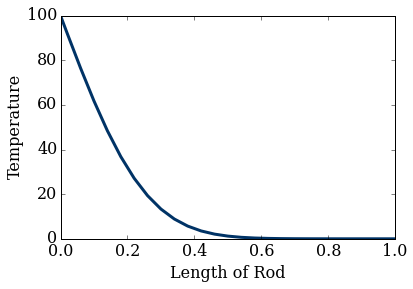

In [9]:
pyplot.plot(np.linspace(0,1,nx), T, color='#003366', ls='-', lw=3)
pyplot.ylim(0,100)
pyplot.xlabel('Length of Rod')
pyplot.ylabel('Temperature');

## Boundary Conditions

In [36]:
nt = 1000
Tn2 = np.zeros((nt,len(Ti)))
Tn2[0,:] = Ti.copy()

for t in range(1,nt):    
    Tn2[t,:] = ftcs(Ti.copy(), t, dt, dx, alpha)

SyntaxError: 'return' outside function (<ipython-input-36-75bf2fe997e0>, line 7)

In [35]:
print(Tn2)

[[ 100.            0.            0.         ...,    0.            0.            0.        ]
 [ 100.           50.            0.         ...,    0.            0.            0.        ]
 [ 100.           50.           25.         ...,    0.            0.            0.        ]
 ..., 
 [ 100.           97.44139892   94.88279784 ...,    2.88872547
     1.44436273    0.        ]
 [ 100.           97.44139892   94.88723745 ...,    2.89307197
     1.44436273    0.        ]
 [ 100.           97.44361872   94.88723745 ...,    2.89307197
     1.44653598    0.        ]]


In [23]:
def animate(data):
    x = np.linspace(0,1,nx)
    y = data
    line.set_data(x,y)
    return line,

In [ ]:
fig = plt.figure();
ax = plt.axes(xlim=(0.0,1.0),ylim=(0,100));
line, = ax.plot([],[],lw=2);

anim = animation.FuncAnimation(fig, animate, frames=Tn2, interval=50)
display_animation(anim, default_mode='once')

### Neumann Boundary

In [37]:
def ftcs_mixed(T, nt, dt, dx, alpha):
    """Solves the diffusion equation with forward-time, centered scheme using
    Dirichlet b.c. at left boundary and Neumann b.c. at right boundary
    
    Parameters:
    ----------
    u: array of float
        Initial temperature profile
    nt: int
        Number of time steps
    dt: float
        Time step size
    dx: float
        Mesh size
    alpha: float
        Diffusion coefficient (thermal diffusivity)
        
    Returns:
    -------
    u: array of float
        Temperature profile after nt time steps with forward in time scheme
    
    """
    for n in range(nt):  
        Tn = T.copy() 
        T[1:-1] = Tn[1:-1] + alpha*dt/dx**2*(Tn[2:] -2*Tn[1:-1] + Tn[0:-2])
        T[-1] = T[-2]
        
    return T

In [38]:
nt = 1000
T = ftcs_mixed(Ti.copy(), nt, dt, dx, alpha)

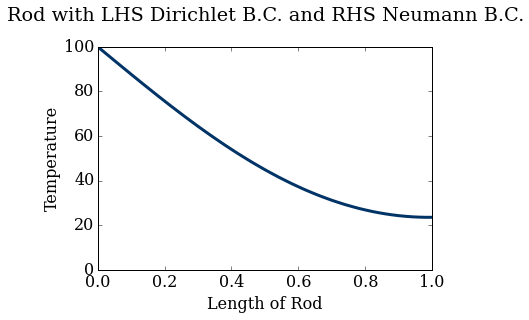

In [39]:
pyplot.plot(np.linspace(0,1,nx), T, color='#003366', ls='-', lw=3)
pyplot.ylim(0,100)
pyplot.title('Rod with LHS Dirichlet B.C. and RHS Neumann B.C.\n')
pyplot.xlabel('Length of Rod')
pyplot.ylabel('Temperature');

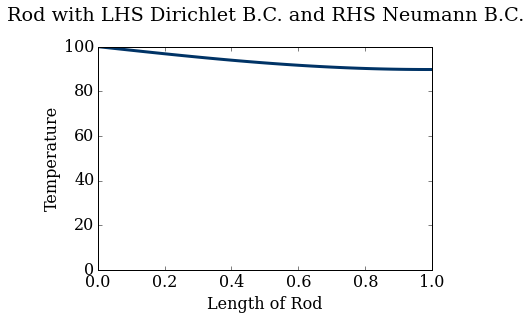

In [40]:
nt = 5000
T = ftcs_mixed(Ti.copy(), nt, dt, dx, alpha)

pyplot.plot(np.linspace(0,1,nx), T, color='#003366', ls='-', lw=3)
pyplot.ylim(0,100)
pyplot.title('Rod with LHS Dirichlet B.C. and RHS Neumann B.C.\n')
pyplot.xlabel('Length of Rod')
pyplot.ylabel('Temperature');

In [10]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = 'C:\\Users\\croberts94\\Desktop\\GitHub\\MAE6286\\connor_style.css'
HTML(open(css_file, "r").read())